In [8]:
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import (
    kurtosis,
    skew,
)
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

plt.rcParams["figure.figsize"] = [9,5]

Let's look at our data.

In [9]:
data = pd.read_csv('data/insurance3r2.csv')
print(data.head())

   age  sex     bmi  steps  children  smoker  region      charges  \
0   19    0  27.900   3009         0       1       3  16884.92400   
1   18    1  33.770   3008         1       0       2   1725.55230   
2   28    1  33.000   3009         3       0       2   4449.46200   
3   33    1  22.705  10009         0       0       1  21984.47061   
4   32    1  28.880   8010         0       0       1   3866.85520   

   insuranceclaim  
0               1  
1               1  
2               0  
3               0  
4               1  


Medical charges are probably one of the most important features in deciding insurance claim.

In [9]:
print('Summary Statistics of Medical Costs\n')
print('{}\n'.format(data['charges'].describe()))
print('skew:  {}'.format(skew(data['charges'])))
print('kurtosis:  {}'.format(kurtosis(data['charges'])))

Summary Statistics of Medical Costs

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

skew:  1.5141797118745743
kurtosis:  1.595821363956751


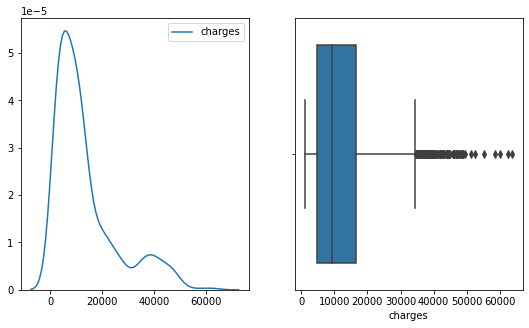

In [3]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(data['charges'], ax=axes[0])
sns.boxplot(data['charges'], ax=axes[1])
plt.show()

It's commonly known that smokers are at risk of many serious ilnesses and health issues hence could have higher medical costs.
We can check medical costs distribution for smokers and non-smokers to confirm our hypothesis.

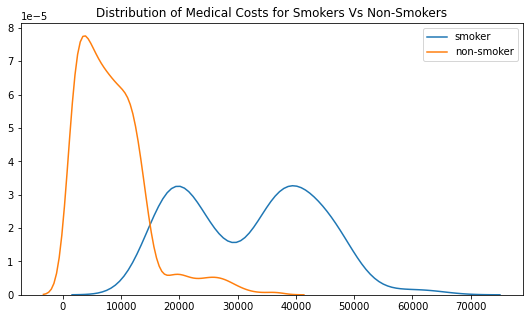

In [46]:
smoker = data[data['smoker']==1]
non_smoker = data[data['smoker']==0]

plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
ax = sns.kdeplot(smoker['charges'], label='smoker')
ax = sns.kdeplot(non_smoker['charges'], label='non-smoker')
plt.show()

LGBM and XGBoost are very popular gradient boosting decision tree algorithms. Let's check which one performs better on our dataset using cross-validation.

But first, we need to check if there are any missing values to fill.

In [40]:
for k, col in data.items():
    print('Missing values in {}: {}'.format(k, col.isnull().sum()))

Missing values in age: 0
Missing values in sex: 0
Missing values in bmi: 0
Missing values in steps: 0
Missing values in children: 0
Missing values in smoker: 0
Missing values in region: 0
Missing values in charges: 0
Missing values in insuranceclaim: 0


In [41]:
X = data.drop('insuranceclaim', axis=1)
y = data.get('insuranceclaim')

clf = LGBMClassifier()

scores = cross_val_score(clf, X, y, cv=5)
print('LGBM score: {:.4f}'.format(scores.mean()))

LGBM score: 0.9798


In [42]:
X = data.drop('insuranceclaim', axis=1)
y = data.get('insuranceclaim')

clf = XGBClassifier()

scores = cross_val_score(clf, X, y, cv=5)
print('XGBoost score: {:.4f}'.format(scores.mean()))

XGBoost score: 0.9873


XGBoost performed significantly better. Luckily, it has built in tree visualization functions.

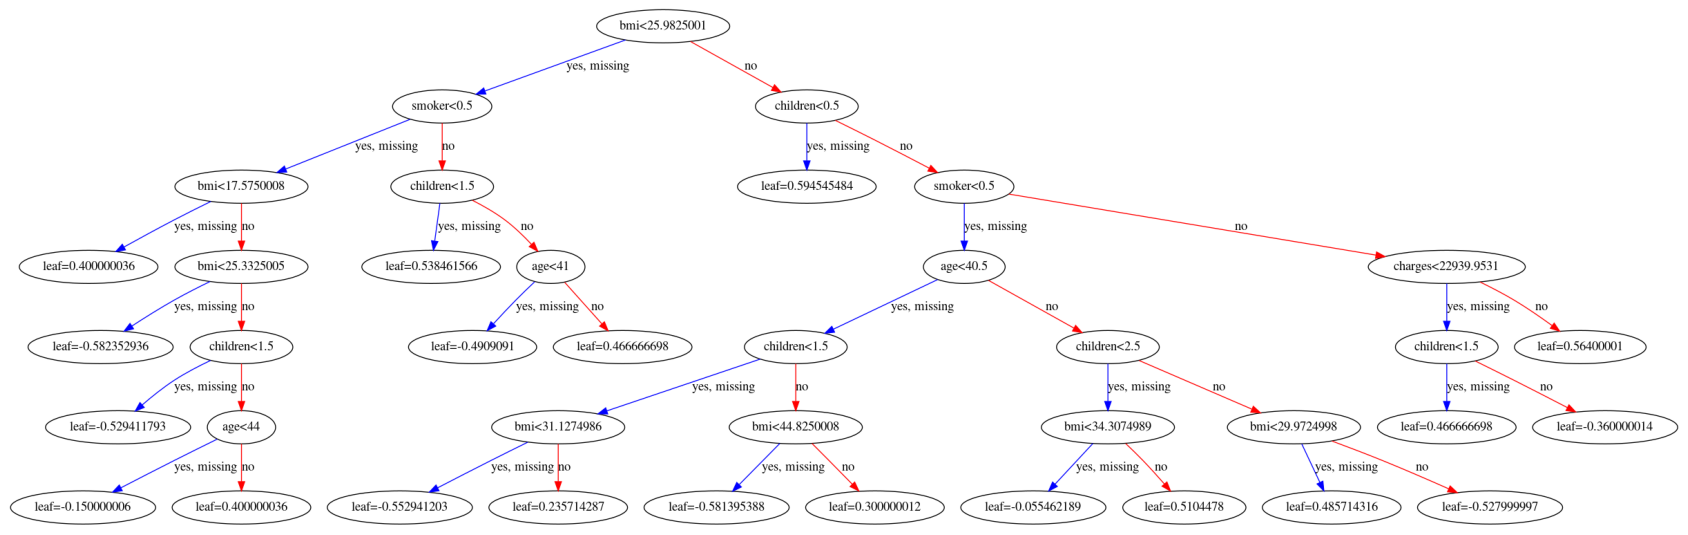

In [62]:
from xgboost import plot_tree

X = data.drop('insuranceclaim', axis=1)
y = data.get('insuranceclaim')

clf = XGBClassifier()
clf.fit(X, y)

plot_tree(clf)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.show()
